In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib.colors import LinearSegmentedColormap
import os
folder = '../../data/canon/'

In [2]:
dataframes = {}
for archive in os.listdir(folder):
    if archive.endswith('.csv') and os.path.isfile(os.path.join(folder, archive)):
        df = pd.read_csv(os.path.join(folder, archive))
        df.reset_index(inplace=True)
        df = df[['sequence', 'half_life_seconds']]
        dataframes[archive] = df

In [3]:
for key in dataframes:
    dataframes[key]['source'] = key
df_concat=pd.concat(dataframes.values(), ignore_index=True)

In [4]:
df_concat

,sequence,half_life_seconds,source
0,AAAMSQVTN,15840.0,Antiviral_canon.csv
1,AACEVAKNLNESLIDLQELGKYEQYIKW,15840.0,Antiviral_canon.csv
2,AAGAVVNDL,15840.0,Antiviral_canon.csv
3,AAHLIDALYAEFLGGRVLTT,15840.0,Antiviral_canon.csv
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,15840.0,Antiviral_canon.csv
...,...,...,...
2932,SLRRSSCFGGRMDRIGAQSGLGCNSFRY,156.0,Serum_canon.csv
2933,MCMPCFTTDHQMARKCDDCCGGKGRGKCYGPQCLCR,50400.0,Serum_canon.csv
2934,KRFKKFFKKVKKSVKKRLKKIFKKPMVIGVTIPF,4260.0,Serum_canon.csv
2935,KRFKKFFKKVKKSV,1260.0,Serum_canon.csv


In [7]:
df_concat['source'].value_counts()

source
Antiviral_canon.csv    2181
HLP_10_canon.csv        189
PEP_LIFE_canon.csv      188
HLP_16_canon.csv        186
Plifepred_canon.csv     176
Serum_canon.csv          17
Name: count, dtype: int64

In [5]:
#se crea un diccionario y una variable para guardar las keys
sum_correlations = None
corr_data=[]
keys = list(dataframes.keys())
df_values=pd.DataFrame()
for i in range(1000):
#Se recorren las keys y se guardan los valores de half_life_seconds en un diccionario
    for j in range(len(keys)):
        df=df_concat[df_concat['source']==keys[j]]
        df_values[keys[j]] = shuffle(df['half_life_seconds'].values, random_state=i, n_samples=17)
    corr_data.append(df_values.corr())
    corr_iter = df_values.corr()
    if sum_correlations is None:
        sum_correlations = corr_iter
    else:
        sum_correlations += corr_iter

KeyboardInterrupt: 

In [ ]:
df_correlation=pd.DataFrame()
df_correlation=pd.concat(corr_data)
df_correlation=df_correlation.sort_index()

In [ ]:
df_correlation

,Antiviral_canon.csv,HLP_10_canon.csv,HLP_16_canon.csv,PEP_LIFE_canon.csv,Plifepred_canon.csv,Serum_canon.csv
Antiviral_canon.csv,1.000000,0.660590,-0.160855,0.086892,0.145271,-0.242650
Antiviral_canon.csv,1.000000,0.649657,0.170598,-0.189440,-0.125945,0.204830
Antiviral_canon.csv,1.000000,0.477839,0.254367,0.330883,0.367588,-0.332915
Antiviral_canon.csv,1.000000,-0.171249,-0.230751,0.102448,-0.237821,-0.149975
Antiviral_canon.csv,1.000000,0.637645,-0.350616,-0.083157,-0.129973,0.129614
...,...,...,...,...,...,...
Serum_canon.csv,-0.185623,0.375137,-0.085541,-0.037843,-0.075575,1.000000
Serum_canon.csv,0.430446,0.051428,0.136627,0.218554,-0.210469,1.000000
Serum_canon.csv,-0.040647,-0.209133,-0.207910,0.284956,0.266336,1.000000
Serum_canon.csv,0.240558,-0.155683,-0.195328,0.009381,-0.264521,1.000000


In [ ]:
avg_correlation = sum_correlations / 1000
avg_correlation

,Antiviral_canon.csv,HLP_10_canon.csv,HLP_16_canon.csv,PEP_LIFE_canon.csv,Plifepred_canon.csv,Serum_canon.csv
Antiviral_canon.csv,1.000000,0.002763,-0.007228,0.000715,-0.002330,-0.004101
HLP_10_canon.csv,0.002763,1.000000,0.123045,-0.044515,0.017284,-0.005000
HLP_16_canon.csv,-0.007228,0.123045,1.000000,-0.012807,0.003000,-0.006486
PEP_LIFE_canon.csv,0.000715,-0.044515,-0.012807,1.000000,-0.008194,0.005177
Plifepred_canon.csv,-0.002330,0.017284,0.003000,-0.008194,1.000000,-0.003763
Serum_canon.csv,-0.004101,-0.005000,-0.006486,0.005177,-0.003763,1.000000


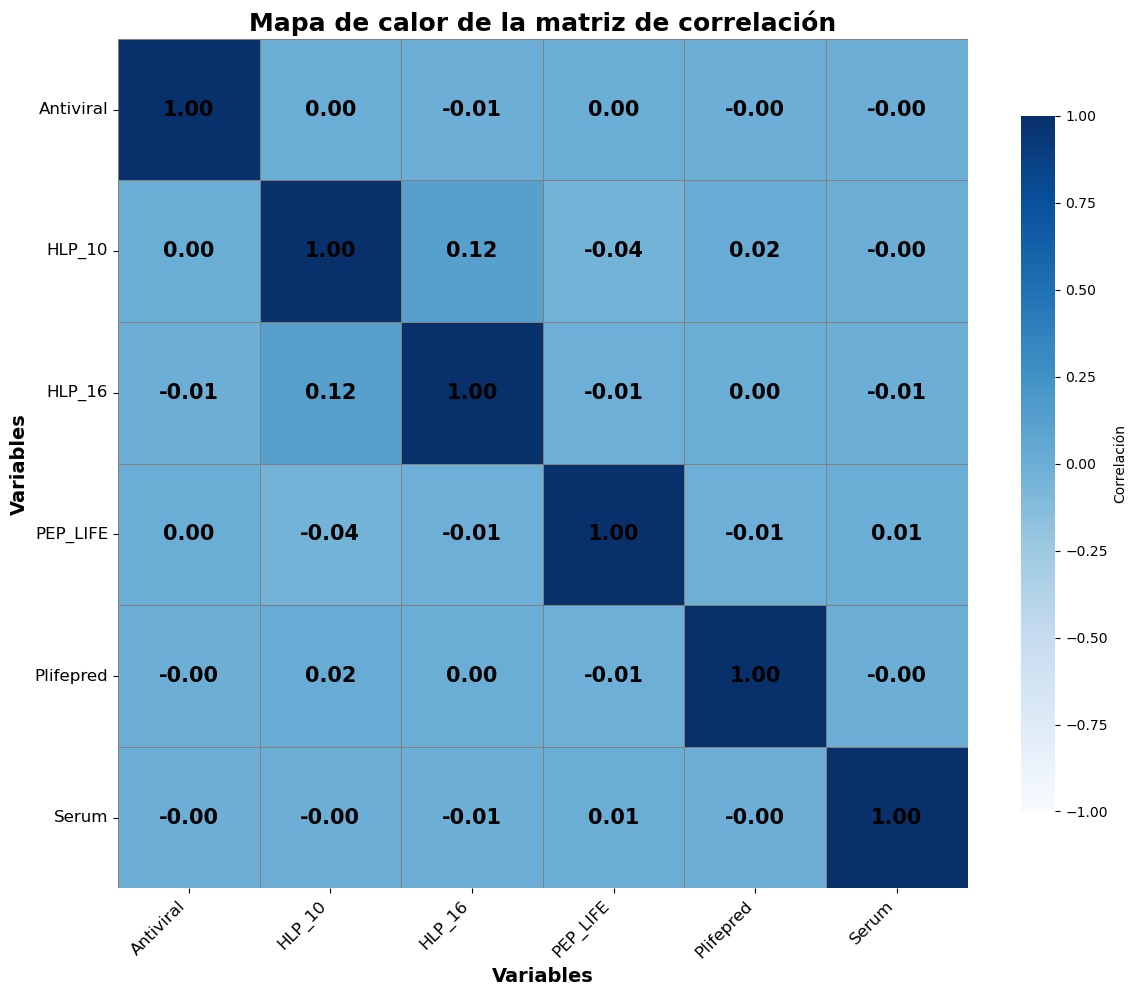

In [ ]:
new_labels = [label.replace('_canon.csv', '') for label in avg_correlation.index]
avg_correlation.index = new_labels
avg_correlation.columns = new_labels

# Crear la figura con ejes
fig, ax = plt.subplots(figsize=(12, 10))

# Crear el mapa de calor con la paleta 'cubehelix'
sns.heatmap(
    avg_correlation, annot=True, fmt=".2f", cmap="Blues", vmin=-1, vmax=1, center=0,
    cbar_kws={'label': 'Correlación', 'shrink': 0.8},  # Ajuste de la barra de color
    annot_kws={'size': 15, 'weight': 'bold', 'color': 'black'},  # Estilo de los números
    linewidths=0.5, linecolor='gray',  # Líneas finas entre celdas
    square=True,  # Hacer cuadrado el gráfico
    xticklabels=True, yticklabels=True,  # Etiquetas visibles
    mask=avg_correlation.isnull(),  # Enmascarar valores nulos si los hay
    ax=ax  # Asegurarse de que el gráfico se dibuje en los ejes correctos
)

# Títulos y etiquetas con un estilo más destacado
ax.set_title('Mapa de calor de la matriz de correlación', fontsize=18, weight='bold')
ax.set_xlabel('Variables', fontsize=14, weight='bold')
ax.set_ylabel('Variables', fontsize=14, weight='bold')

# Mejorar la visualización de las etiquetas
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Ajustar el layout para evitar que se corten las etiquetas
plt.tight_layout()

# Guardar la imagen con un nombre más descriptivo
plt.savefig("../../img/datasets/correlation_heatmap.png", dpi=300)

# Mostrar el gráfico
plt.show()

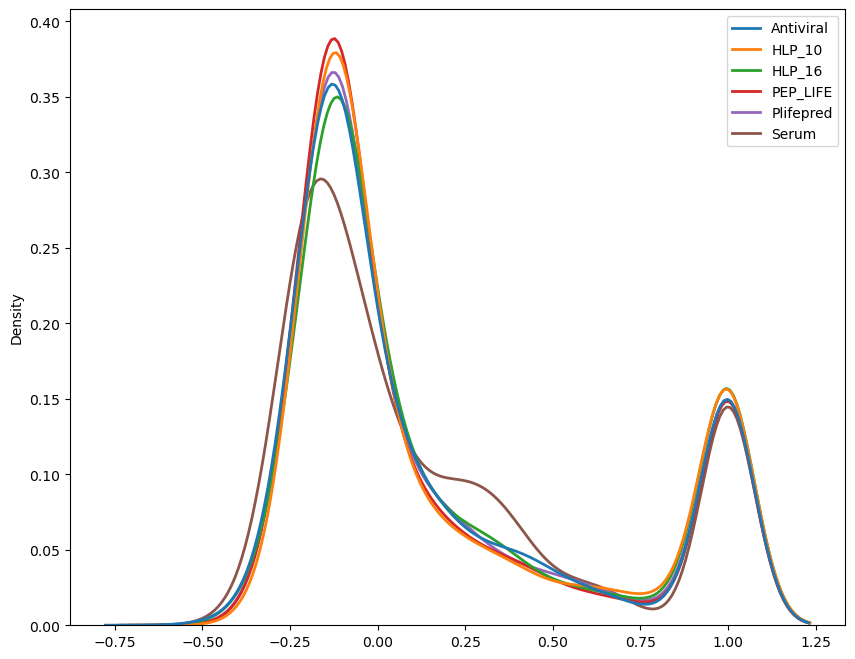

In [ ]:
# Si df_correlation es un DataFrame con nombres en el índice
custom_colors = ["#03045e", "#262d79", "#475492", "#677bab", "#88a2c4", "#a9c9dd", "#caf0f6"]
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", custom_colors)
if isinstance(df_correlation, pd.DataFrame):
    df_correlation.index = [label.replace('_canon.csv', '') for label in df_correlation.index]
    df_correlation.columns = [label.replace('_canon.csv', '') for label in df_correlation.columns]

plt.figure(figsize=(10, 8))  

# Solo dibujar el KDE con el gradiente de colores
sns.kdeplot(df_correlation, color=custom_cmap(0.6), linewidth=2)

plt.savefig("../../img/datasets/correlation_kde.png", dpi=300)
# Mostrar el gráfico
plt.show()
